# Cornerplots of various features for lensed system

The OM10 mock lensed quasar catalog qso_mock.fits contains a list of LSST-like samples. Using the OM10 mock catalog and observation history data, we can generate a toy catalog for SLRealizer. Using the toy catalog, we can null-deblend the catalog and generate the cornerplot to easily compare different features. This notebook shows how to make the cornerplot using `twinkles_observation_history` and `om10`. The figure below is a workflow, a simple summary of what this notebook does.

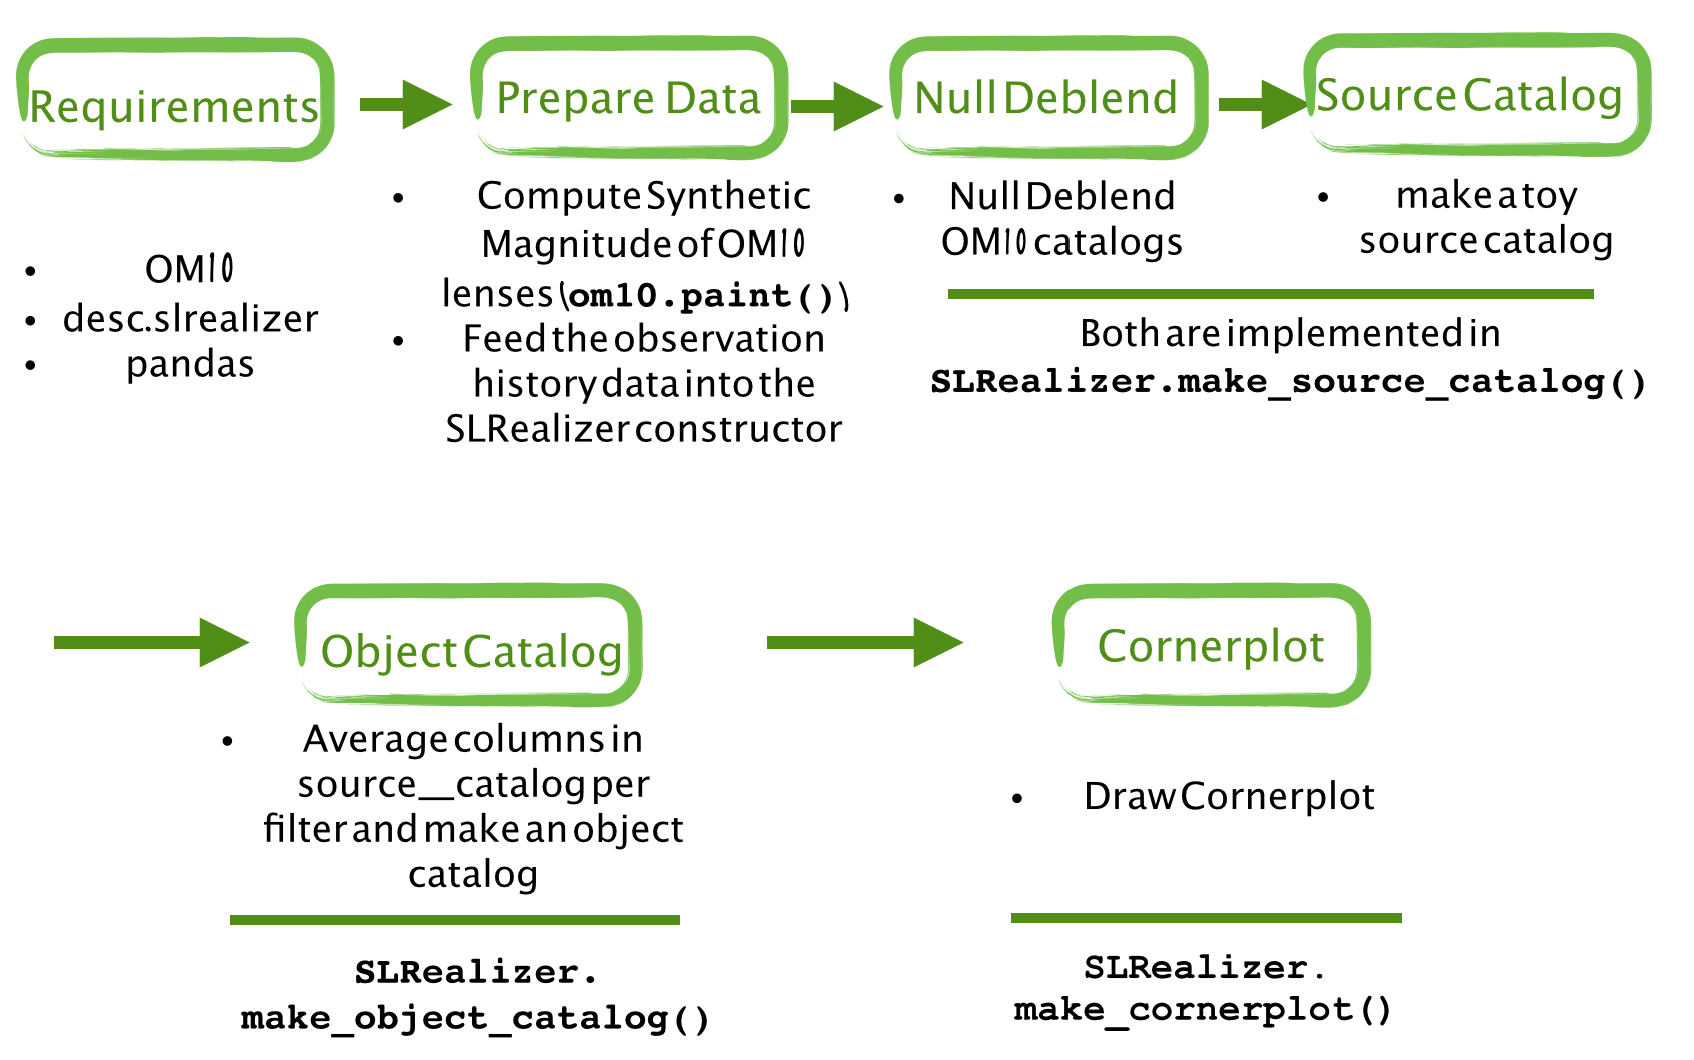

In [1]:
from IPython.display import Image, display
display(Image("../../../img/workflow.png"))

## Requirements
You will need om10 and desc.slrealizer to run the code. In addition, you will need to use pandas dataframe to read the csv file.

In [2]:
import om10
import desc.slrealizer
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

/Users/Jenny/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


The lines below enable the jupyter notebook to display inline plots.

In [3]:
%matplotlib inline
%pylab inline
matplotlib.use('TkAgg')
matplotlib.rc('text', usetex=False)

Populating the interactive namespace from numpy and matplotlib


## Preparing the data to draw cornerplot

First, we need OM10 to get lensed systems. OM10 catalog is named `qso_mock.fits`, and it is in the `/data/` folder. In order to get synthetic magnitudes for the lensed system, we need to call `db.paint` method. This method will update `db.sample` to have synthetic magnitudes for each filter.

In [4]:
db = om10.DB(vb=False, catalog='../../../data/qso_mock.fits')
db.paint(synthetic=True)

Then, we initialize the SLRealizer. Call the constructor for SLRealizer, passing in the om10 object `db` from the previous cell and the observation history.

In [5]:
realizer = desc.slrealizer.SLRealizer(catalog=db, observation="../../../data/twinkles_observation_history.csv")

Using OM10 catalog and the observational history, we will make the toy source catalog. We just have to call `realizer.make_source_catalog()` method. This will produce 400 lensed system * 400 observation epochs = 160,000 rows in the toy source catalog.

Caution: This method will take around six hours to finish executing. The resulting catalog is already in the `data` folder, so please use that instead to save your time.

In [6]:
realizer.make_source_catalog()

From the OM10 catalog, I am selecting LSST lenses


KeyboardInterrupt: 

After generating the source catalog, we have to make an object catalog. This object catalog is made by averaging all the columns for each lensed system per filter in the source catalog. 

In [7]:
realizer.make_object_catalog()

Reading in the catalog


Then we are done preparing the data needed for the `generate_cornerplot` method. However, please read the docstring to get an idea of how to call the method. You have to specify params or option to let the method know what kind of features you want to see in the cornerplot. Thus, not mentioning any of those arguments will give you this message:

In [8]:
realizer.generate_cornerplot(object_table_dir='../../../data/object_table.csv')

either specify params or option. You can choose among :
[None, 'size', 'x_position', 'y_position', 'color', 'ellipticity', 'magnitude']
or specify columns in the source table that you want to see in the cornerplot.


## Drawing the cornerplot

### I. Size

The size is defined to be the determinant of covariance matrix, which can be also simplified as
$$q_{xx} * q_{yy} - q_{xy} * q_{xy}$$. We can notice that the size of the lensed system decreased when we go from $u$ , $g$ , $r$ , $i$, and $z$. This is reasonable because the quasar images will be brighter in the bluer filters, creating larger blended objects. This plot shows a strong correlation between adjacent bands.

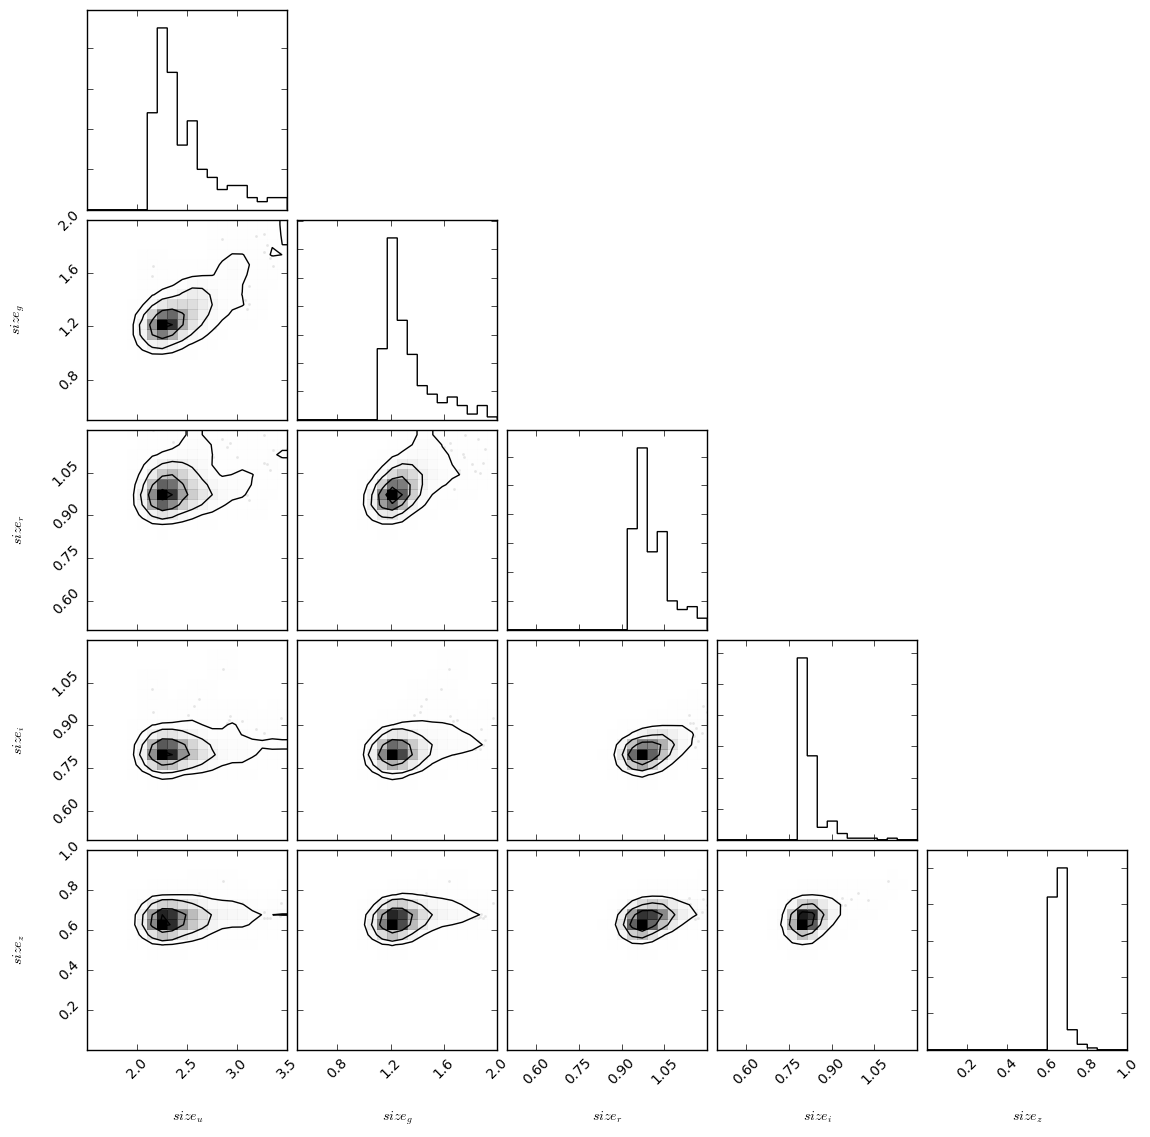

In [9]:
fig = realizer.generate_cornerplot(object_table_dir='../../../data/object_table.csv', option=['size'], range = [(1.5, 3.5), (0.5, 2.0), (0.5, 1.20), (0.5, 1.2), (0, 1.0)])

### II. Color

We then can see the colors of the lensed systems in different filter by setting the `option='color'` keyword. This plots $g-r$, $r-i$, and $i-z$ onto the cornerplot. The lensed systems were generally red (color index averaging around 1.1), showing that the quasar images were much dimmer than the lensing galaxy's images almost every time. There was a bimodal distribution in the histogram in $r-i$ and $i-z$ plot. One possible hypothesis to explain this is that some system had brighter quasar images than the others.

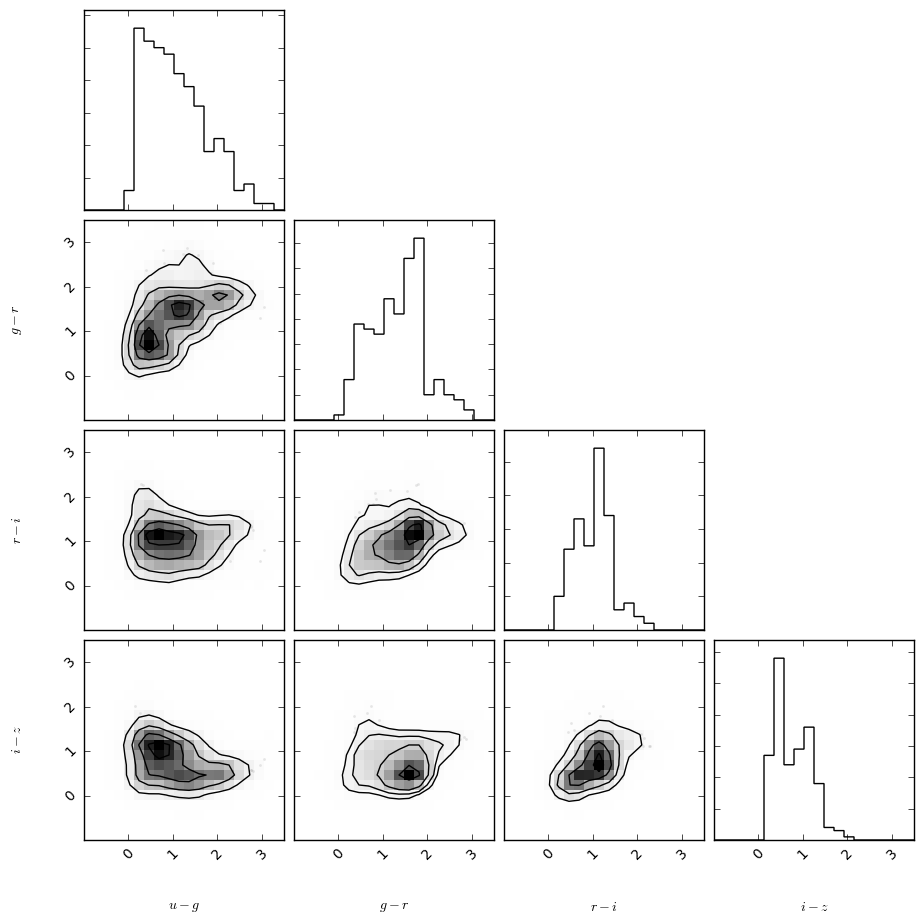

In [10]:
fig = realizer.generate_cornerplot(object_table_dir='../../../data/object_table.csv', option=['color'], range = [(-1.0, 3.5), (-1.0, 3.5), (-1.0, 3.5), (-1.0, 3.5)])

### III. Ellipticity

Ellipticity is defined as $e = \sqrt{e1^2+e2^2}$ where

$e1 = (qxx-qyy)/(qxx+qyy)$

$e2 = 2*qxy/(qxx+qyy)$

By looking at $e$ in each filter, we could notice that $e$ decreased when we went from u, g, r, i, to z. This is also reasonable -- quasar images will be much brighter in the bluer filters. Because the null-deblended source will be stretched in bluer filters, ellipticity will decrease as the wavelength of filters decrease.

* By definition, $e$ has a value from zero to one[0, 1].

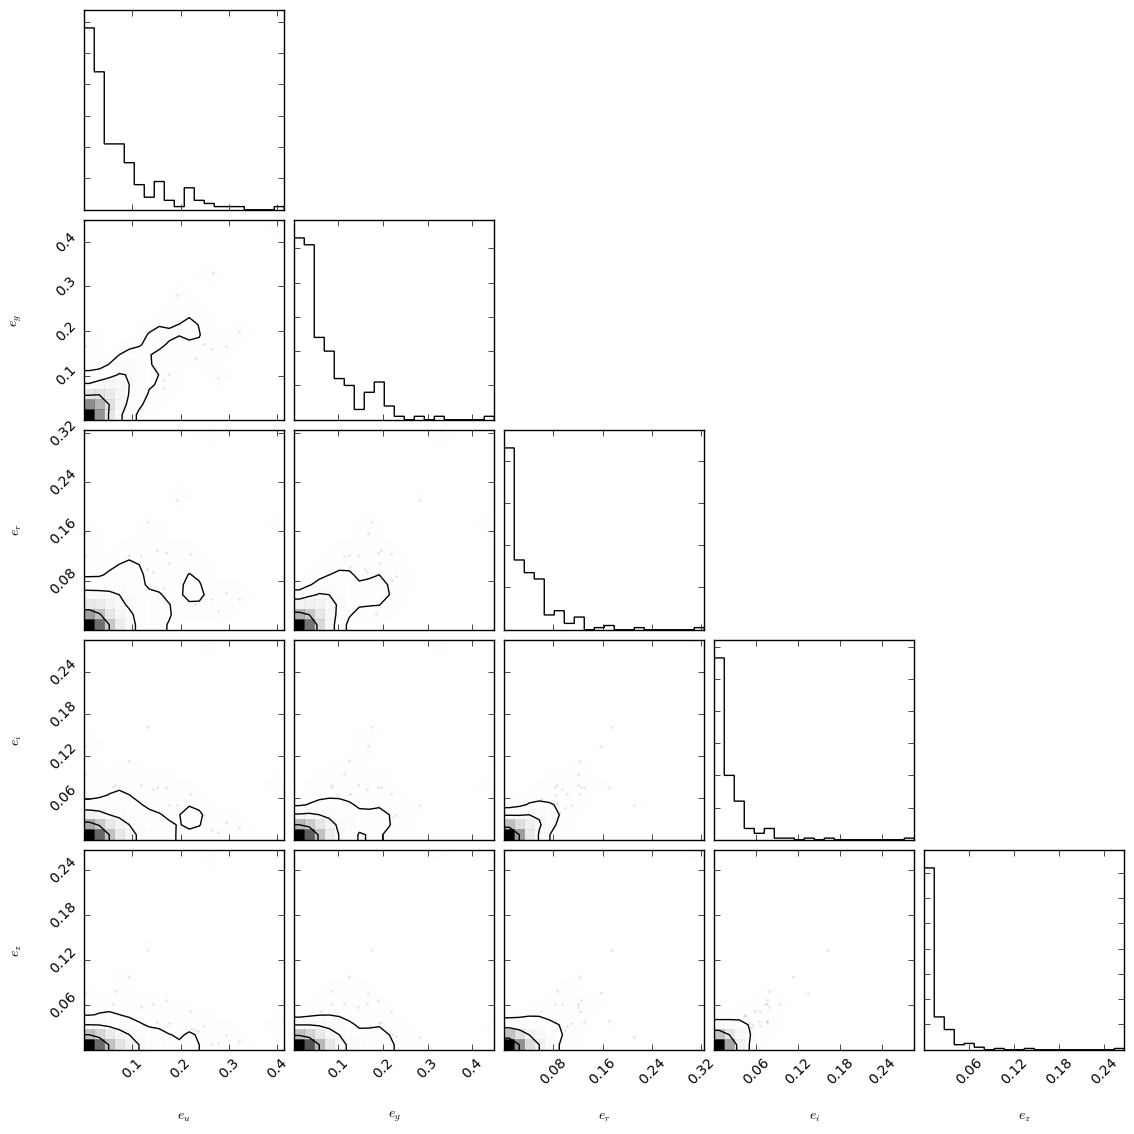

In [11]:
fig = realizer.generate_cornerplot(object_table_dir='../../../data/object_table.csv', option=['ellipticity'])

### IV. Magnitude

This cornerplot plots different magnitudes in different bands. There was a strong correlation between one and another bands, but it would not give that much of a useful information.

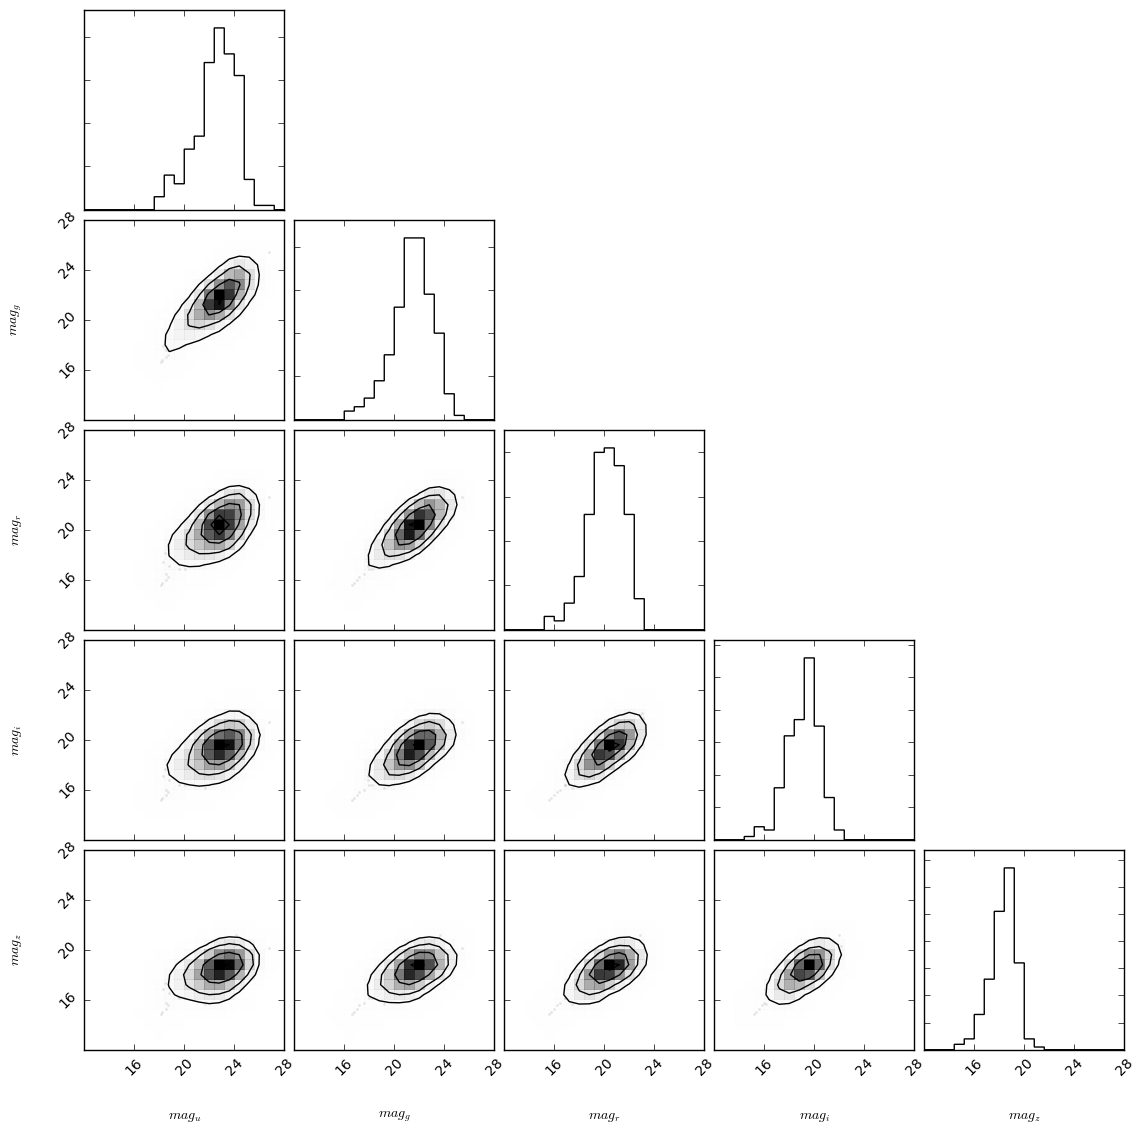

In [12]:
fig = realizer.generate_cornerplot(object_table_dir='../../../data/object_table.csv', option=['magnitude'], range=[(12, 28), (12, 28), (12, 28), (12, 28), (12, 28)])

### V. First moment along the x axis

The position for each filter is a position relative to the $i$ filter. We could see an inverse correlation between $z$ filter and the other filters -- the very botton rows clrealy show that. It shows that the centroids of the lensed system moved when we changed the filter.

We expect LSST to have a resolution of ~15 milli-arcseconds. Thus, the changes in the position for a few lens systems will actually be detectable.

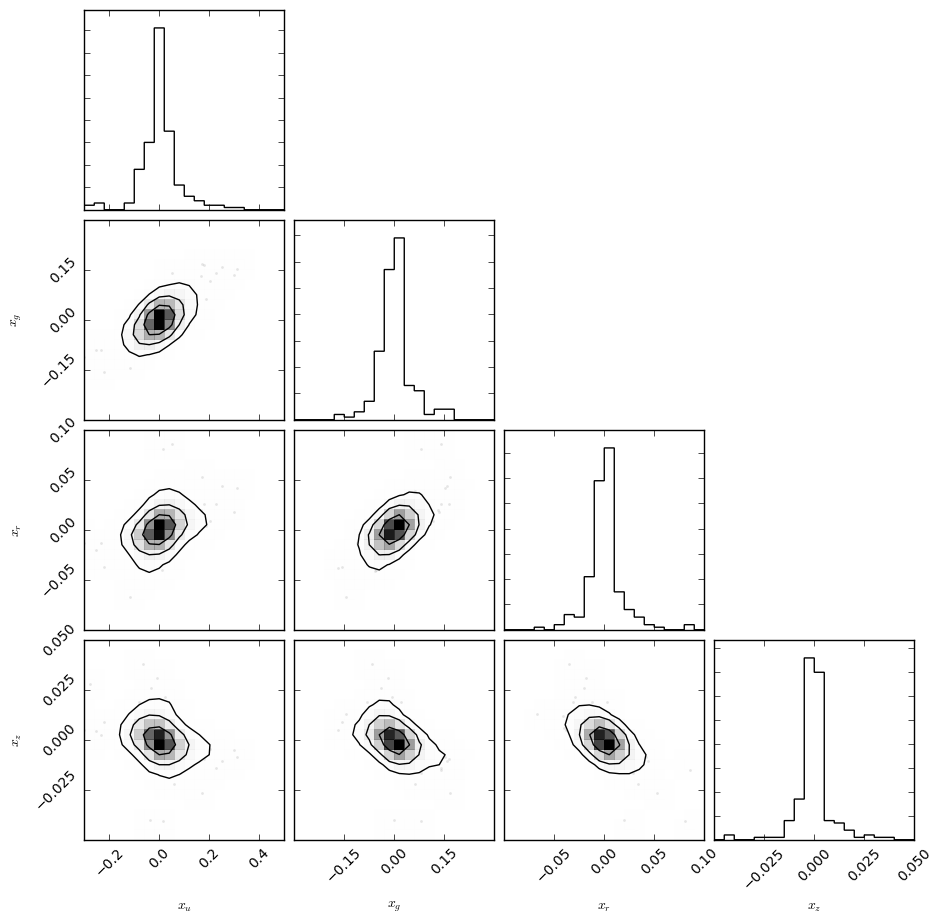

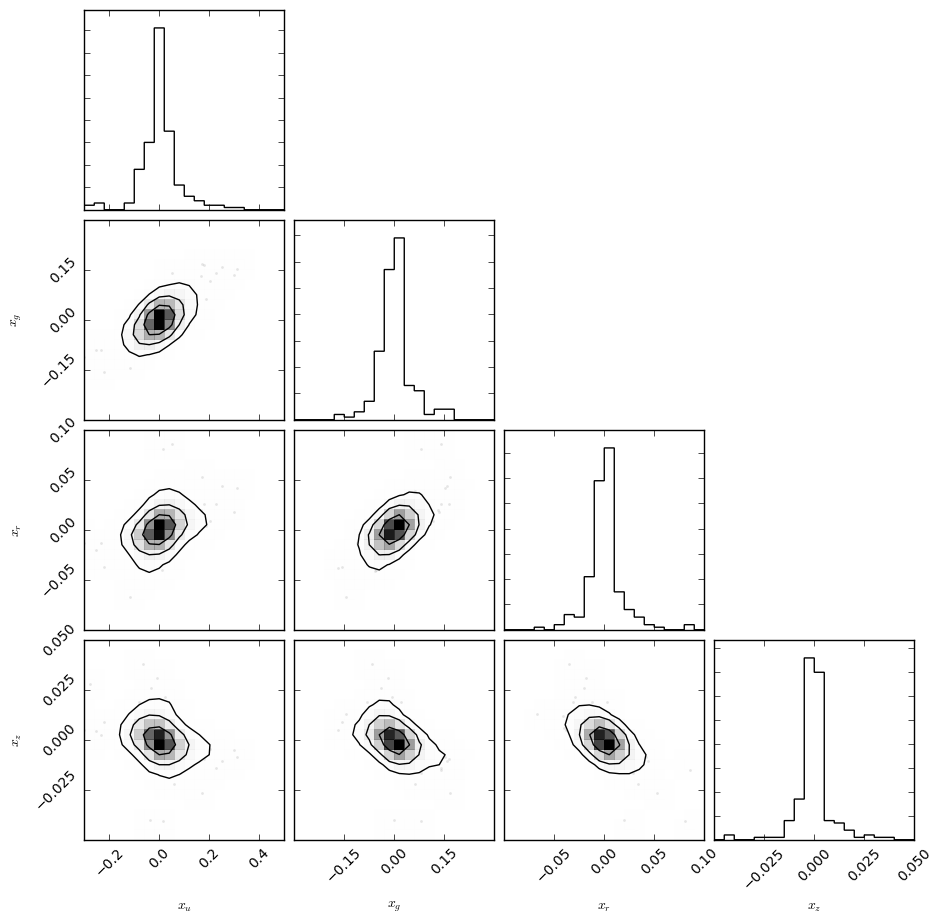

In [13]:
realizer.generate_cornerplot(object_table_dir='../../../data/object_table.csv', option=['x_position'], range = [(-0.3, 0.5), (-0.3, 0.3), (-0.1, 0.1), (-0.05, 0.05)])

### VI. First moment along the y axis

Similarly, the position for each filter is a position relative to the $i$ filter. The spread in the position tends to decrease with the filter's increasing wavelength. The change in the y-positions, however, are smaller than the x-positions.

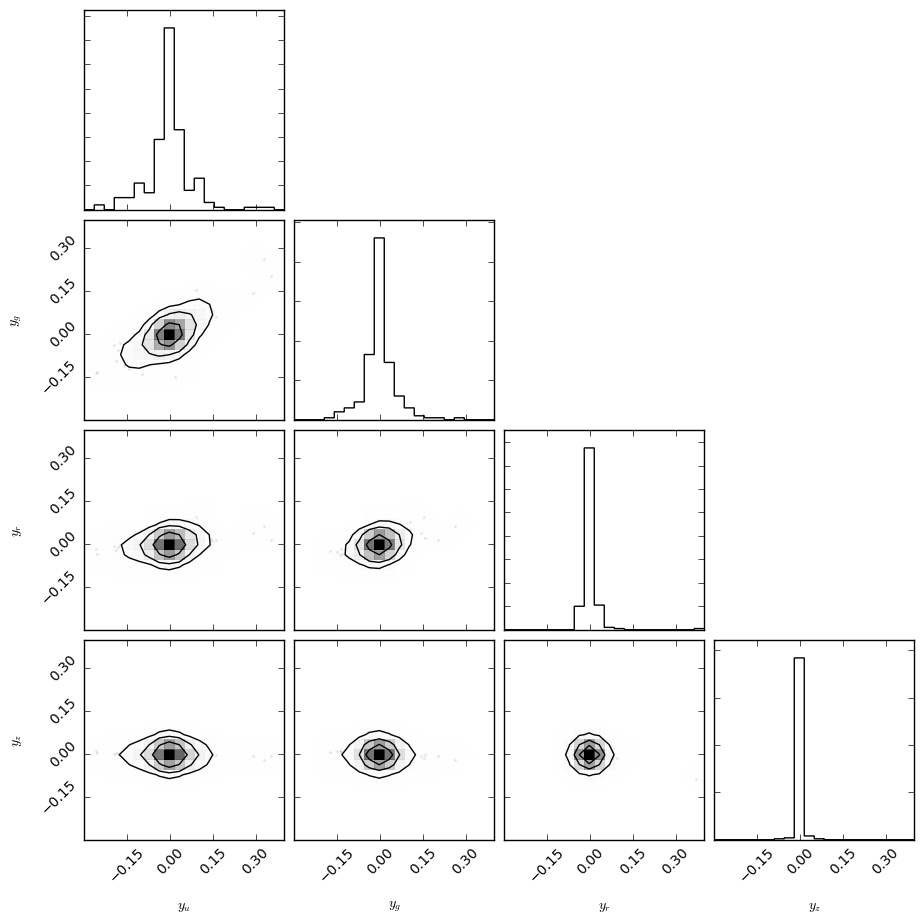

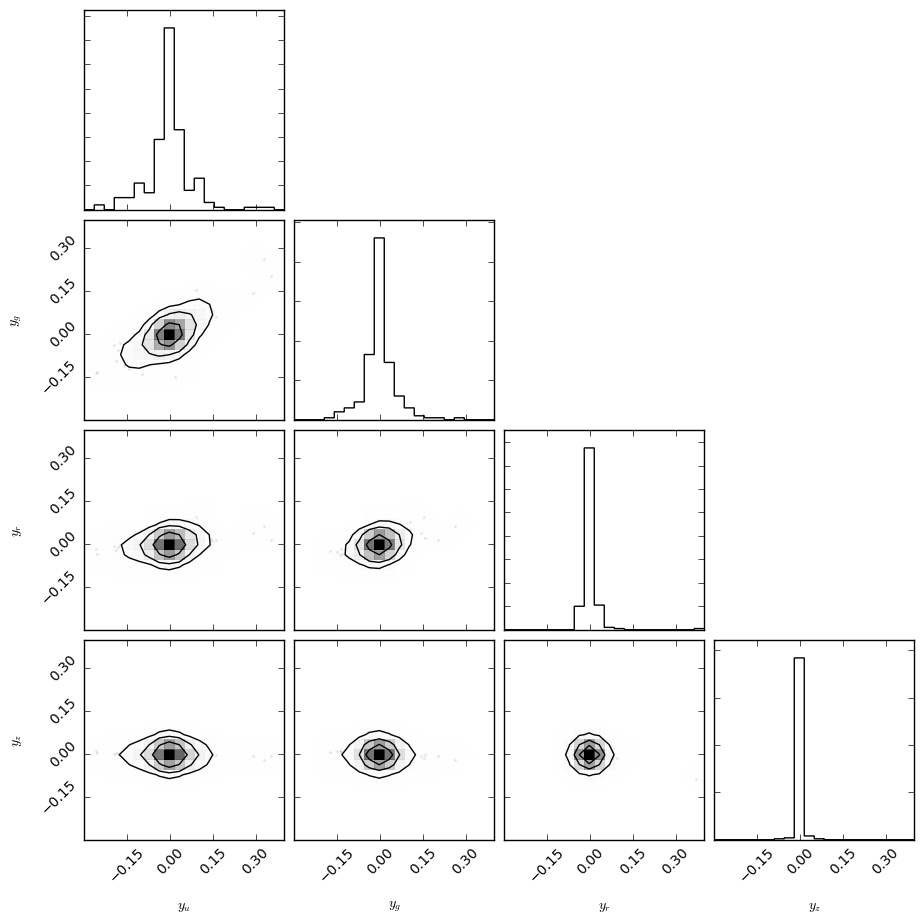

In [14]:
realizer.generate_cornerplot(object_table_dir='../../../data/object_table.csv', option=['y_position'], range=[(-0.3, 0.4), (-0.3, 0.4), (-0.3, 0.4), (-0.3, 0.4)])

### VII. Color & Ellipticity

If we pass in the list that has more than one string, we can plot multiple features in a cornerplot. Here, we can see that there is one strong peak in ellipticity vs either $g-r$ or $r-i$ band, and two strong peaks in ellipticity vs $i-z$ band. 

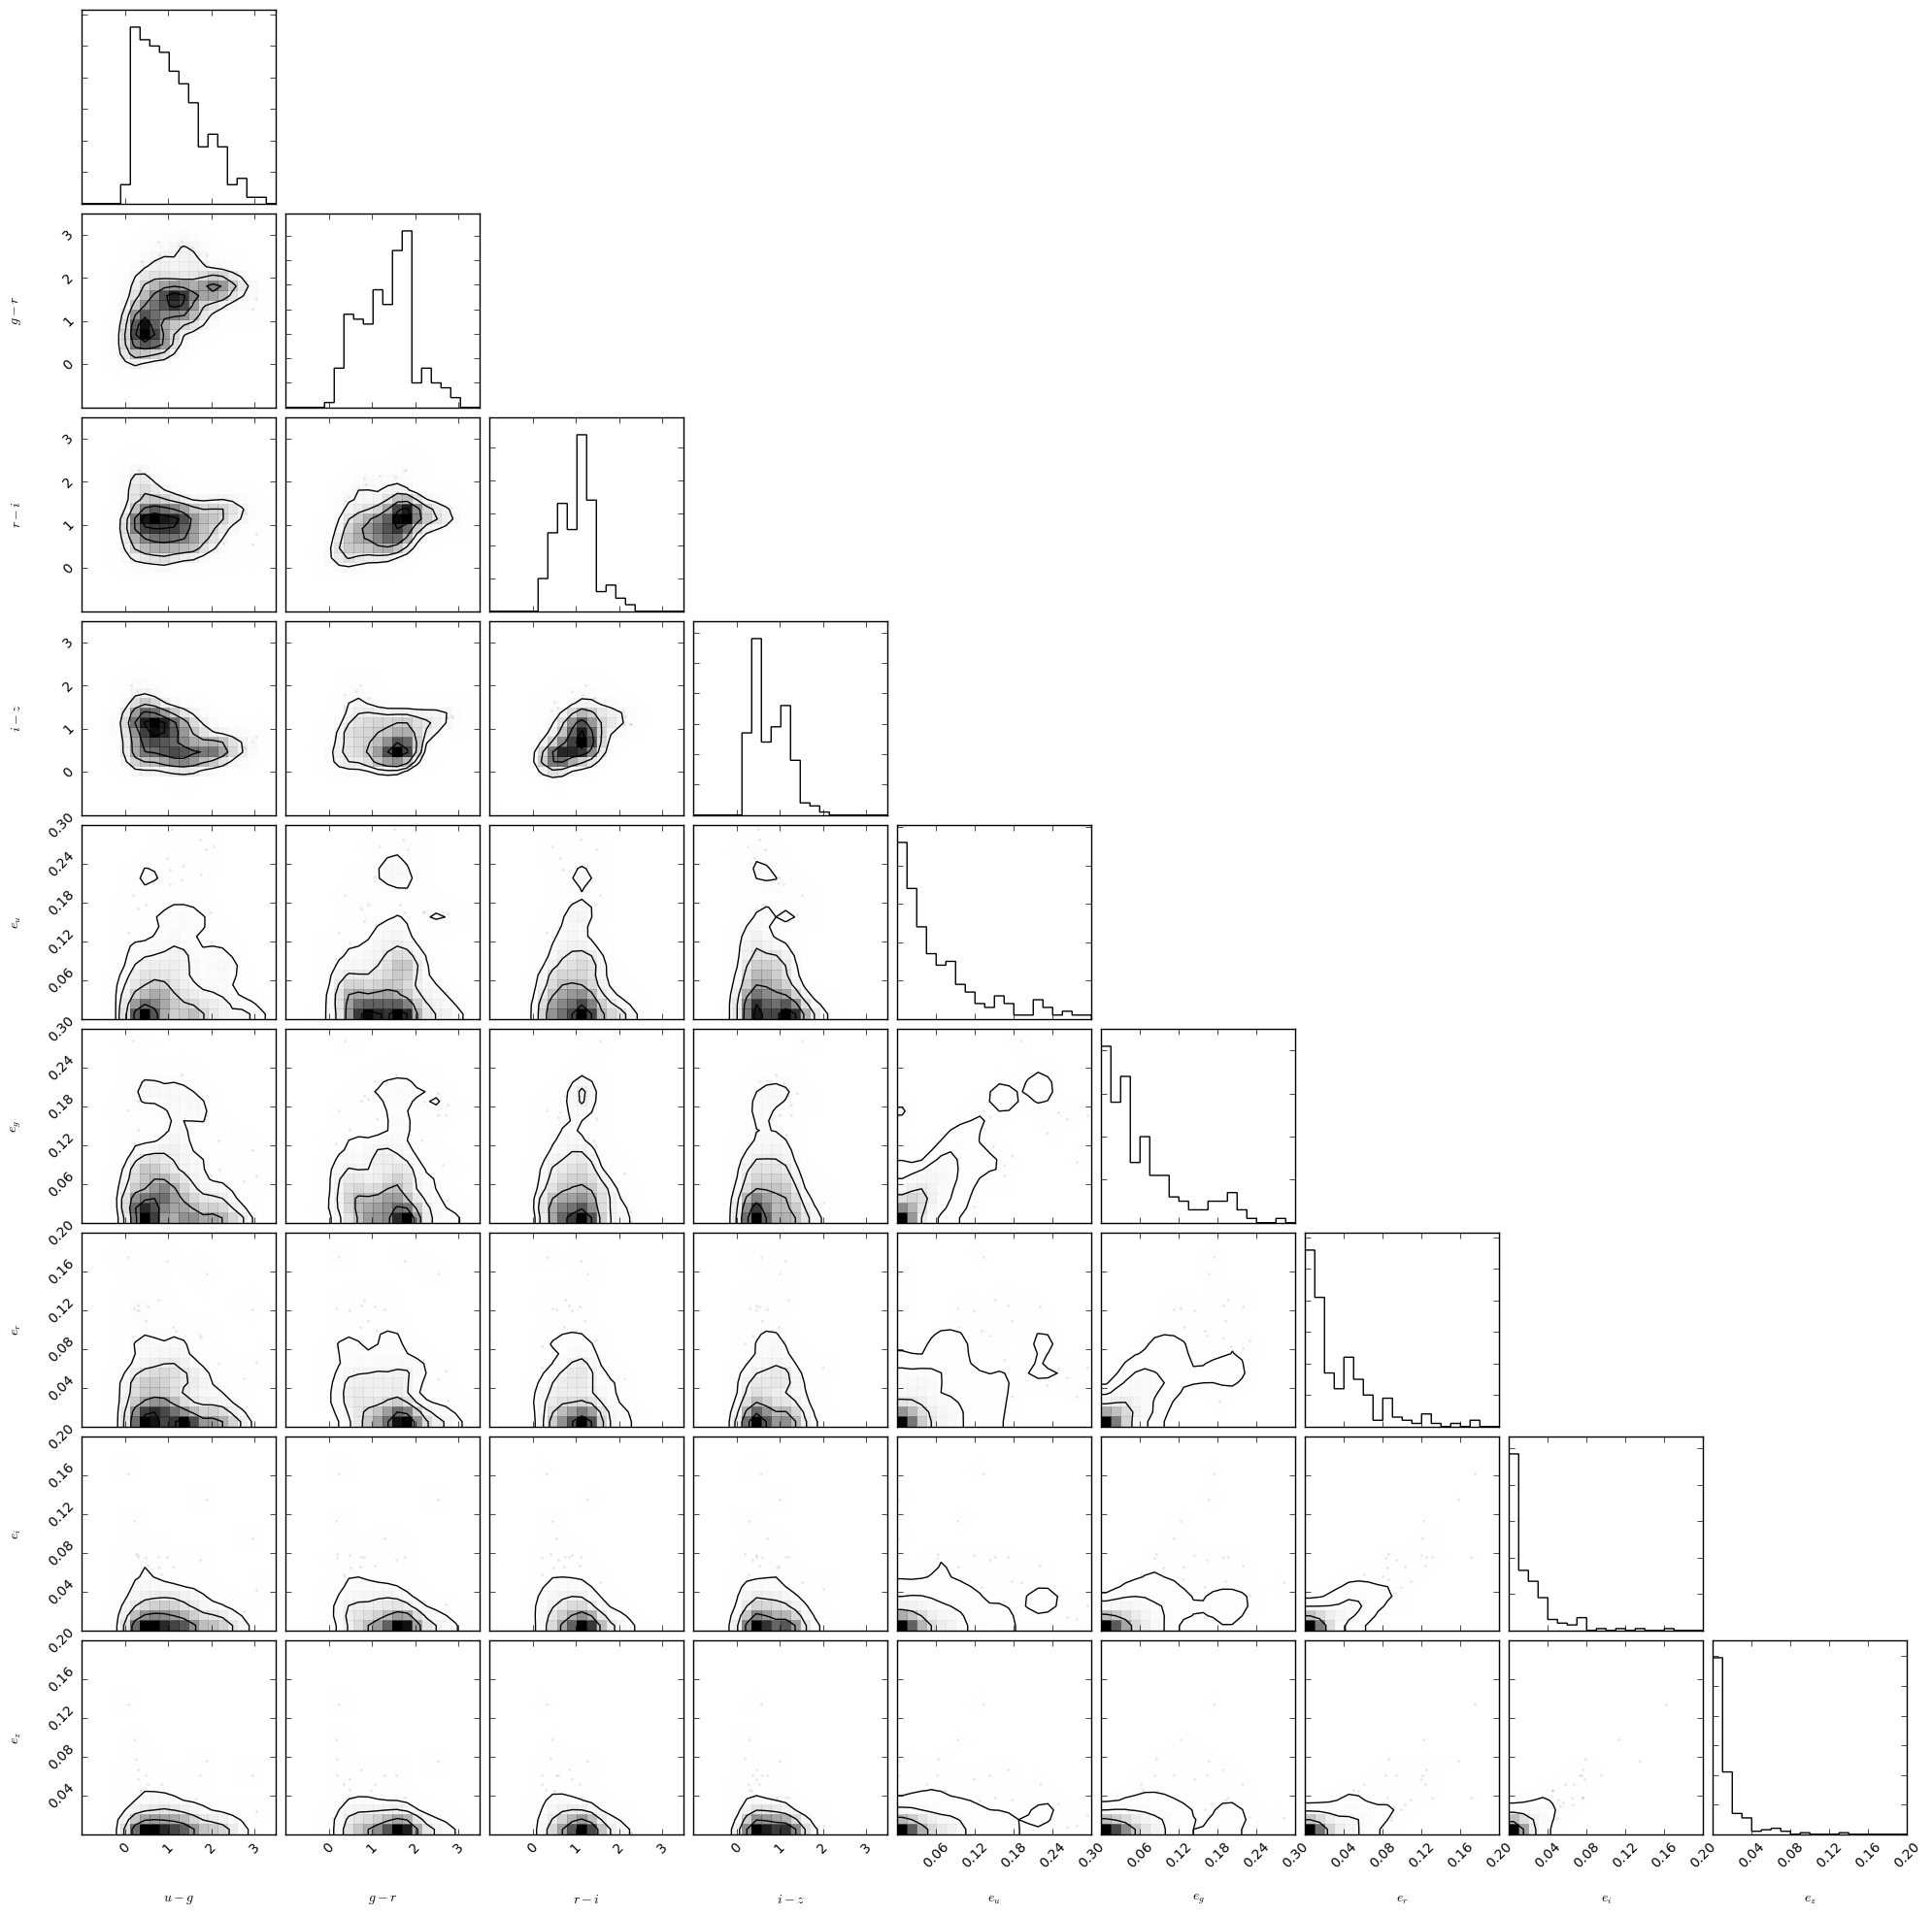

In [15]:
fig = realizer.generate_cornerplot(object_table_dir='../../../data/object_table.csv', option=['color', 'ellipticity'], range=[(-1.0, 3.5), (-1.0, 3.5), (-1.0, 3.5), (-1.0, 3.5), (0, 0.3), (0, 0.3), (0, 0.2), (0, 0.2), (0, 0.2)])

### VIII. Color & Size

The plot was similar to the ellipticity plot. In general, there was less spread in the size than the color indices. Data points were clumped around few peaks.

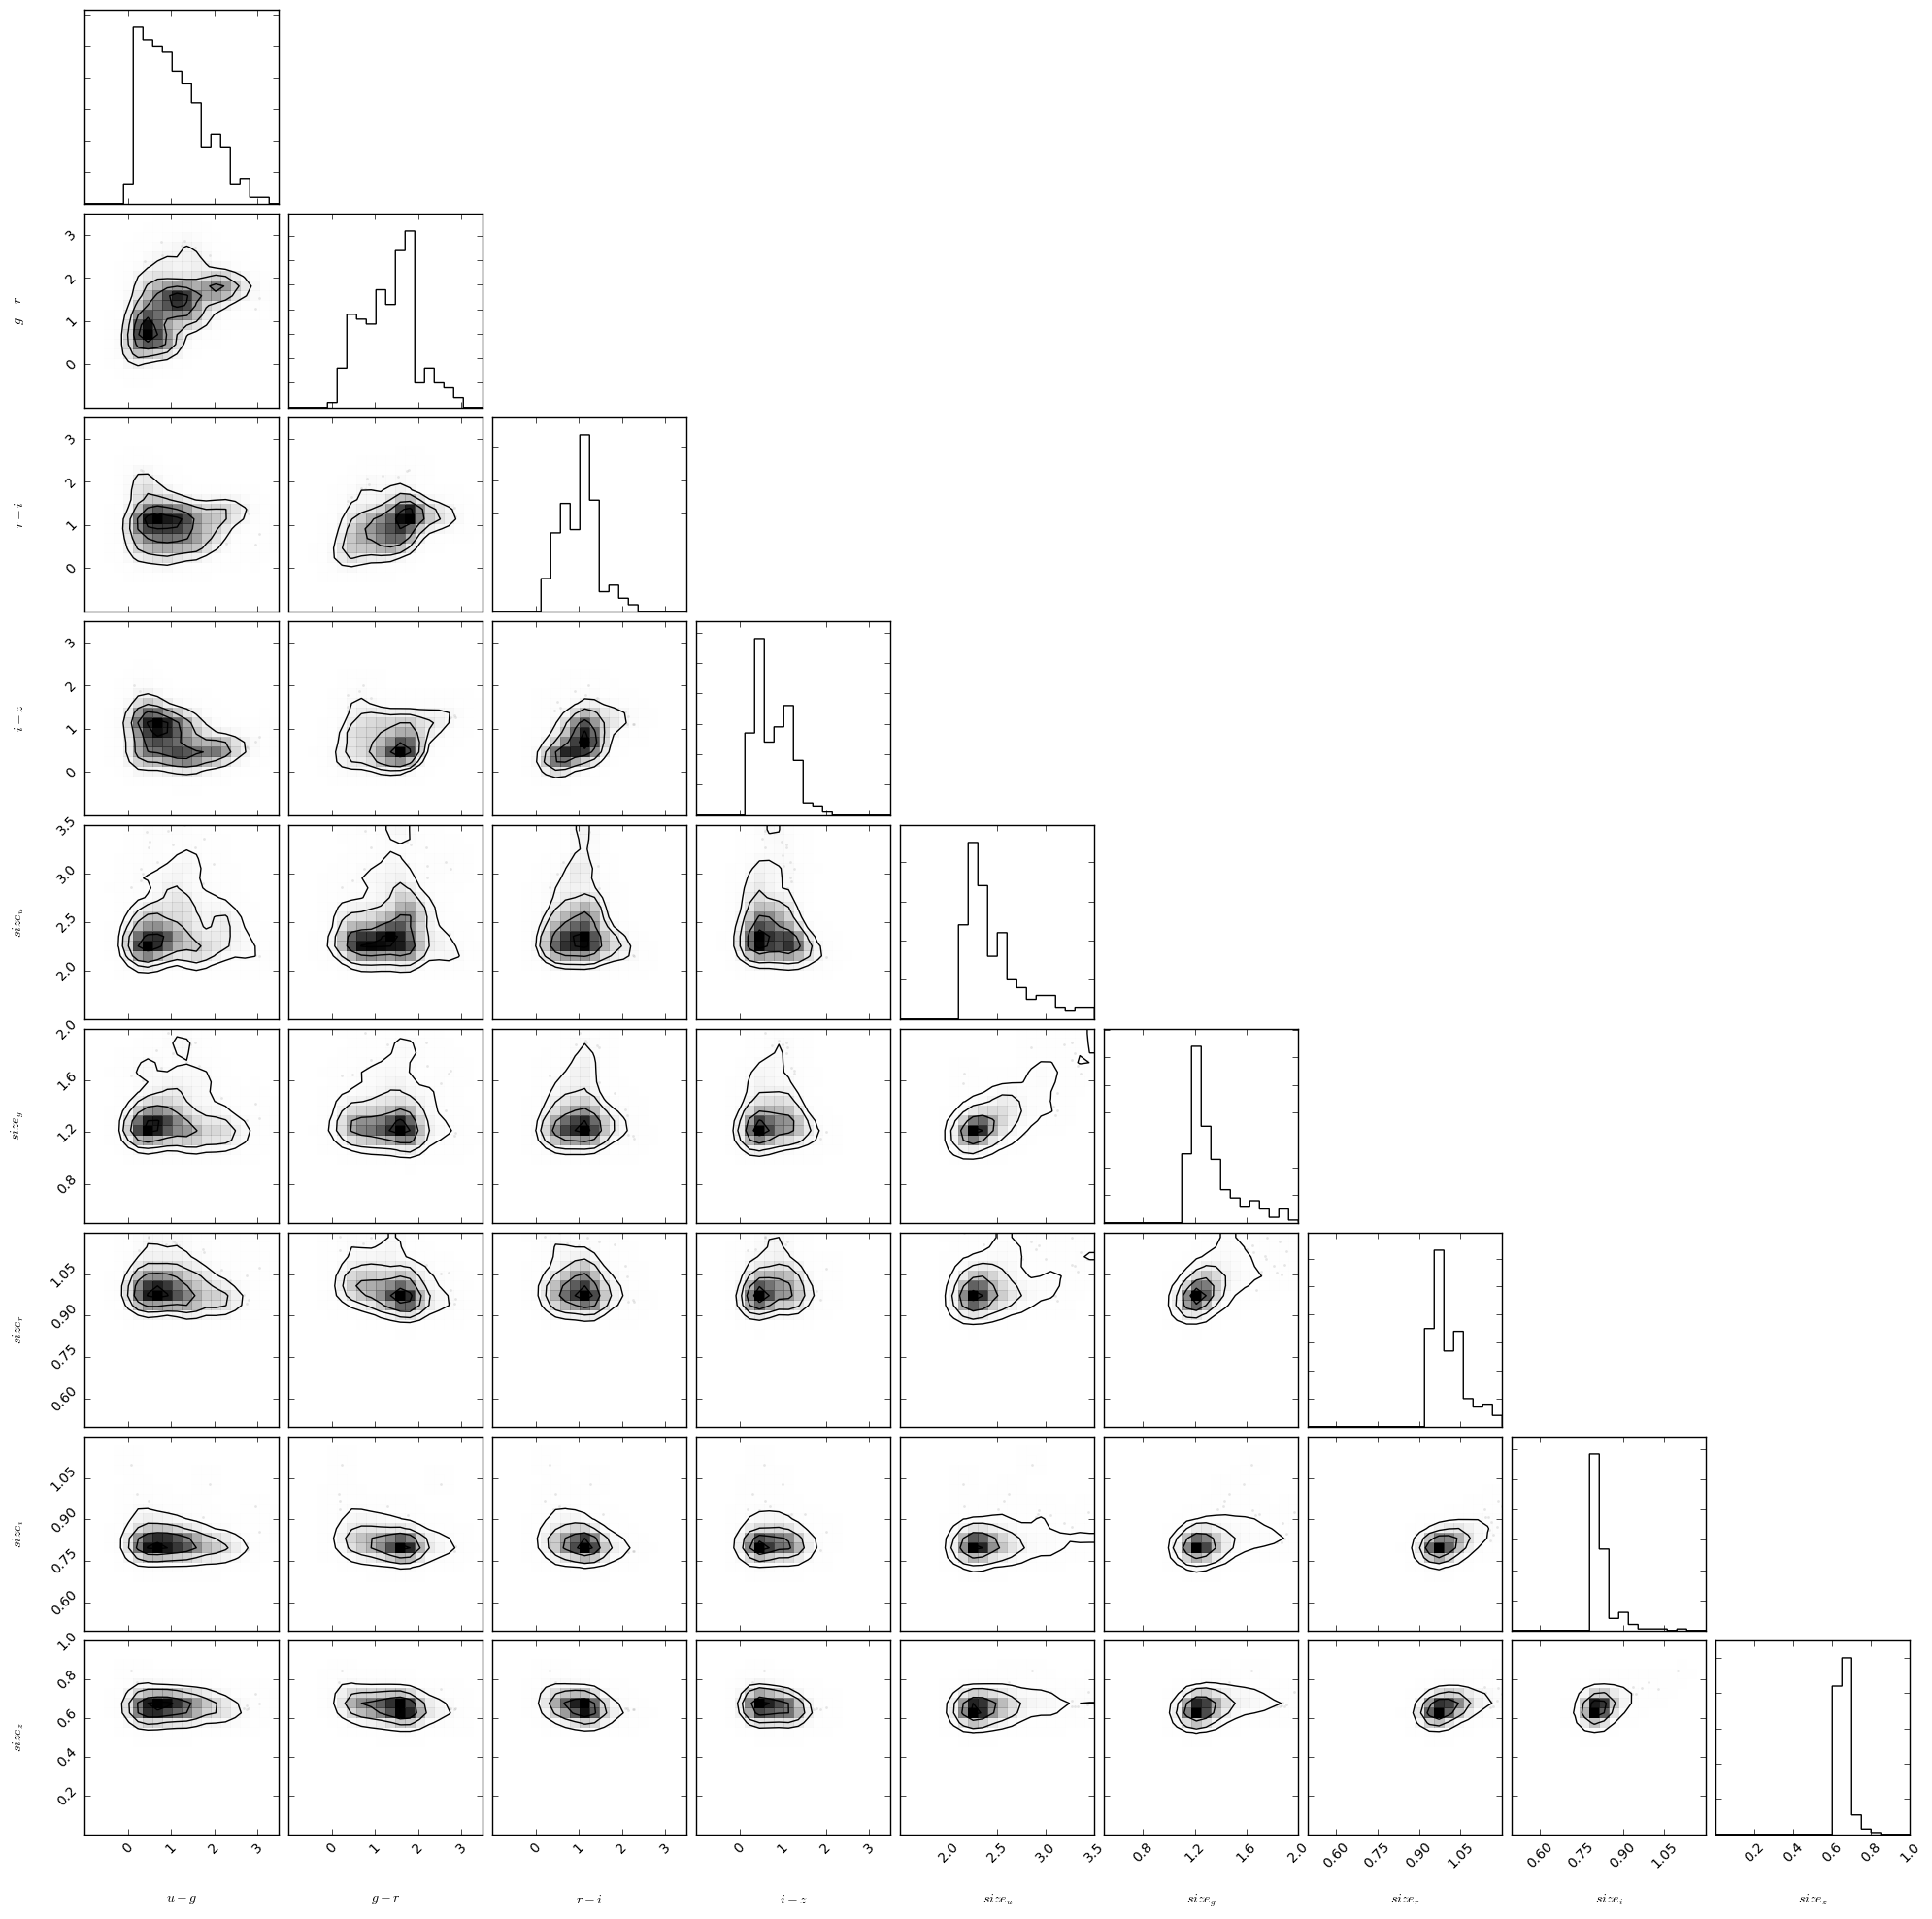

In [16]:
fig = realizer.generate_cornerplot(object_table_dir='../../../data/object_table.csv', option=['color', 'size'], range=[(-1.0, 3.5), (-1.0, 3.5), (-1.0, 3.5), (-1.0, 3.5), (1.5, 3.5), (0.5, 2.0), (0.5, 1.20), (0.5, 1.2), (0, 1.0)])